In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
len(test)

5681

In [5]:
df=pd.concat([train,test],axis=0)


In [6]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
140,DRF48,5.730,Low Fat,0.000000,Soft Drinks,188.3898,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
1333,FDB05,5.155,Low Fat,0.083183,Frozen Foods,248.8776,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
5648,FDR13,9.895,Regular,0.028765,Canned,115.3492,OUT049,1999,Medium,Tier 1,Supermarket Type1,1274.3412
4919,NCD07,9.100,Low Fat,0.055515,Household,112.5518,OUT049,1999,Medium,Tier 1,Supermarket Type1,341.5554
4528,NCZ29,15.000,Low Fat,0.071371,Health and Hygiene,125.2362,OUT046,1997,Small,Tier 1,Supermarket Type1,1384.1982


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [8]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
nan_val=df.isnull().sum()
nan_val[nan_val>0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [11]:
for i in df.columns:
    print(i,'\n',df[i].unique())
    print('no of unquie',df[i].nunique())

Item_Identifier 
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
no of unquie 1559
Item_Weight 
 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.7

In [12]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [13]:
df.shape

(14204, 12)

In [14]:
mean=df.groupby(['Item_Identifier'])['Item_Weight'].mean()
mean.values


array([11.6 , 19.35,  8.27, ..., 10.5 ,  9.6 , 14.65])

In [15]:
g_mean=df.pivot_table(index='Item_Identifier',values='Item_Weight',aggfunc=lambda x:x.mean())
g_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [16]:
nan_index=df[df['Item_Weight'].isnull()].index
nan_index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            5627, 5634, 5640, 5643, 5648, 5655, 5656, 5661, 5665, 5669],
           dtype='int64', length=2439)

In [17]:
for i,value in enumerate( df.Item_Identifier):
    if i in nan_index:
        if value in g_mean.index:
            df['Item_Weight'][i]=g_mean.loc[value]['Item_Weight']
            

In [18]:
df.Item_Weight.isnull().sum()

0

In [19]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':'low fat','LF':'low fat','reg':'regular','Regular':'regular'})

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
fill=pd.pivot_table(index='Outlet_Type',values='Outlet_Size',aggfunc=lambda x:x.mode(),data=df)
fill

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [23]:
miss_val=df[df['Outlet_Size'].isnull()].index
miss_val

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            5647, 5649, 5650, 5652, 5662, 5668, 5670, 5678, 5679, 5680],
           dtype='int64', length=4016)

In [24]:
for i,values in enumerate(df.Outlet_Type):
    if i in miss_val:
        if values in fill.index:
            df['Outlet_Size'][i]=fill.loc[values]['Outlet_Size']

In [25]:
df['Outlet_Size'].isnull().sum()

0

In [26]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,low fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
5679,FDJ26,10.30,regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [27]:
visb_index=df[df.Item_Visibility==0].index
visb_index

Int64Index([   3,    4,    5,   10,   32,   33,   46,   60,   72,   79,
            ...
            5597, 5603, 5611, 5614, 5635, 5643, 5648, 5654, 5661, 5679],
           dtype='int64', length=879)

In [28]:
visb_mean=round(df.Item_Visibility.mean(),6)
visb_mean

0.065953

In [29]:
df.Item_Visibility=df.Item_Visibility.apply(lambda x:visb_mean if x==0 else x)

In [30]:
df[df.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [31]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,low fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
5679,FDJ26,10.30,regular,0.065953,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN


In [32]:
df['Outlet_Establishment_Year']=2013-df['Outlet_Establishment_Year']

In [33]:
df1=df.copy(deep=True)

In [34]:
df = df.rename(columns={'Outlet_Establishment_Year': 'Outlet_age'})
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,14,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.065953,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.065953,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,regular,0.013496,Snack Foods,141.3154,OUT046,16,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,regular,0.142991,Starchy Foods,169.1448,OUT018,4,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,low fat,0.073529,Health and Hygiene,118.7440,OUT045,11,Small,Tier 2,Supermarket Type1,NaN
5679,FDJ26,10.30,regular,0.065953,Canned,214.6218,OUT017,6,Medium,Tier 2,Supermarket Type1,NaN


In [35]:
df['Item_Identifier']=df['Item_Identifier'].apply (lambda x:x[0:2])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,14,Small,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.065953,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,low fat,0.065953,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,regular,0.013496,Snack Foods,141.3154,OUT046,16,Small,Tier 1,Supermarket Type1,NaN
5677,FD,7.60,regular,0.142991,Starchy Foods,169.1448,OUT018,4,Medium,Tier 3,Supermarket Type2,NaN
5678,NC,10.00,low fat,0.073529,Health and Hygiene,118.7440,OUT045,11,Small,Tier 2,Supermarket Type1,NaN
5679,FD,10.30,regular,0.065953,Canned,214.6218,OUT017,6,Medium,Tier 2,Supermarket Type1,NaN


In [36]:
df['Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [37]:
df.loc[df['Item_Identifier']=='NC','Item_Fat_Content']='others'
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,OUT049,14,Small,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.065953,Fruits and Vegetables,182.0950,OUT010,15,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,others,0.065953,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,regular,0.013496,Snack Foods,141.3154,OUT046,16,Small,Tier 1,Supermarket Type1,NaN
5677,FD,7.60,regular,0.142991,Starchy Foods,169.1448,OUT018,4,Medium,Tier 3,Supermarket Type2,NaN
5678,NC,10.00,others,0.073529,Health and Hygiene,118.7440,OUT045,11,Small,Tier 2,Supermarket Type1,NaN
5679,FD,10.30,regular,0.065953,Canned,214.6218,OUT017,6,Medium,Tier 2,Supermarket Type1,NaN


In [38]:
df.drop(columns='Outlet_Identifier',axis=1,inplace=True)


In [39]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,14,Small,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.065953,Fruits and Vegetables,182.0950,15,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,others,0.065953,Household,53.8614,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,regular,0.013496,Snack Foods,141.3154,16,Small,Tier 1,Supermarket Type1,NaN
5677,FD,7.60,regular,0.142991,Starchy Foods,169.1448,4,Medium,Tier 3,Supermarket Type2,NaN
5678,NC,10.00,others,0.073529,Health and Hygiene,118.7440,11,Small,Tier 2,Supermarket Type1,NaN
5679,FD,10.30,regular,0.065953,Canned,214.6218,6,Medium,Tier 2,Supermarket Type1,NaN


In [40]:
new_df=pd.get_dummies(data=df,columns=['Item_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'],drop_first=True)

In [41]:
new_df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_others,Item_Fat_Content_regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,Dairy,249.8092,14,3735.1380,1,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,Soft Drinks,48.2692,4,443.4228,0,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,Meat,141.6180,14,2097.2700,1,0,0,0,0,1,0,0,1,0,0
3,19.20,0.065953,Fruits and Vegetables,182.0950,15,732.3800,1,0,0,1,0,1,0,1,0,0,0
4,8.93,0.065953,Household,53.8614,26,994.7052,0,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,Snack Foods,141.3154,16,NaN,1,0,0,1,0,1,0,0,1,0,0
5677,7.60,0.142991,Starchy Foods,169.1448,4,NaN,1,0,0,1,1,0,0,1,0,1,0
5678,10.00,0.073529,Health and Hygiene,118.7440,11,NaN,0,1,1,0,0,1,1,0,1,0,0
5679,10.30,0.065953,Canned,214.6218,6,NaN,1,0,0,1,1,0,1,0,1,0,0


In [42]:
new_df.shape

(14204, 17)

In [43]:
new_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
new_df['Item_Type']=LabelEncoder().fit_transform(new_df['Item_Type'])
new_df

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_others,Item_Fat_Content_regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,14,3735.1380,1,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,4,443.4228,0,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,10,141.6180,14,2097.2700,1,0,0,0,0,1,0,0,1,0,0
3,19.20,0.065953,6,182.0950,15,732.3800,1,0,0,1,0,1,0,1,0,0,0
4,8.93,0.065953,9,53.8614,26,994.7052,0,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,13,141.3154,16,NaN,1,0,0,1,0,1,0,0,1,0,0
5677,7.60,0.142991,15,169.1448,4,NaN,1,0,0,1,1,0,0,1,0,1,0
5678,10.00,0.073529,8,118.7440,11,NaN,0,1,1,0,0,1,1,0,1,0,0
5679,10.30,0.065953,3,214.6218,6,NaN,1,0,0,1,1,0,1,0,1,0,0


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

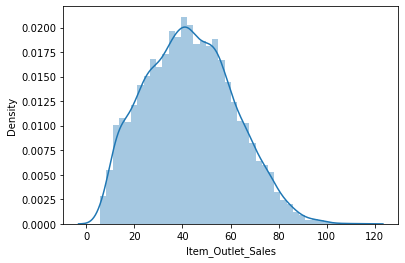

In [46]:
sns.distplot(np.sqrt(new_df.Item_Outlet_Sales))

In [47]:
new_df['Item_Outlet_Sales']=np.sqrt(new_df['Item_Outlet_Sales'])

In [48]:
train=new_df.iloc[:len(train)]
test=new_df.iloc[len(train):]
train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_others,Item_Fat_Content_regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,4,249.8092,14,61.115775,1,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,14,48.2692,4,21.057607,0,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,10,141.6180,14,45.795961,1,0,0,0,0,1,0,0,1,0,0
3,19.200,0.065953,6,182.0950,15,27.062520,1,0,0,1,0,1,0,1,0,0,0
4,8.930,0.065953,9,53.8614,26,31.538947,0,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,26,52.710373,1,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,0,108.1570,11,23.436830,1,0,0,1,0,1,1,0,1,0,0
8520,10.600,0.035186,8,85.1224,9,34.541477,0,1,1,0,0,1,1,0,1,0,0
8521,7.210,0.145221,13,103.1332,4,42.960419,1,0,0,1,1,0,0,1,0,1,0


In [49]:
train['Item_Outlet_Sales'].isnull().sum()

0

In [50]:
y=train['Item_Outlet_Sales']
x=train.drop(axis=1,columns='Item_Outlet_Sales')

In [51]:
x.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_others,Item_Fat_Content_regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,14,1,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,4,0,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,10,141.6180,14,1,0,0,0,0,1,0,0,1,0,0
3,19.20,0.065953,6,182.0950,15,1,0,0,1,0,1,0,1,0,0,0
4,8.93,0.065953,9,53.8614,26,0,1,1,0,0,0,0,1,1,0,0


In [52]:
y

0       61.115775
1       21.057607
2       45.795961
3       27.062520
4       31.538947
          ...    
8518    52.710373
8519    23.436830
8520    34.541477
8521    42.960419
8522    27.670743
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [53]:
print(x.shape,'\n',y.shape)

(8523, 16) 
 (8523,)


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [55]:
x_train.shape

(6818, 16)

In [56]:
x_test.shape

(1705, 16)

In [57]:
y_train.head()

1945    73.273537
1720    35.077035
1954    65.195607
1919    38.497673
2461    48.465889
Name: Item_Outlet_Sales, dtype: float64

In [58]:
y_test.head()

1070    30.866807
6305    33.672799
8504    64.332051
5562    40.708429
1410    26.059854
Name: Item_Outlet_Sales, dtype: float64

In [59]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
y_pred_test=le.predict(x_test)
len(y_pred_test)

1705

In [60]:
train_score=le.score(x_train,y_train)
print('Train score =',train_score)

Train score = 0.6550898355413061


In [61]:
y_pred_train=le.predict(x_train)
y_pred_test=le.predict(x_test)

In [62]:
from sklearn.metrics import r2_score

train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred_test)

print(f'Training accuracy {train_score} \n Testing accuracy {test_score}')

Training accuracy 0.6550898355413061 
 Testing accuracy 0.6555571151608137


In [63]:
score=r2_score(y_test,y_pred_test)
print('R2 score = ',score)

R2 score =  0.6555571151608137


In [64]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squred Error=',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error = 8.645675591954756
Mean Squred Error= 121.2357118926419
Root Mean Squared Error 11.010708964124058


In [65]:
print('Intercept =',(le.intercept_)**2)

Intercept = 21.40256260771262


In [66]:
print('coefficients =',(le.coef_)**2)

coefficients = [1.88505098e-04 1.87361782e+00 5.28250630e-04 2.74509929e-02
 3.38574370e-03 8.95789482e-01 1.24556054e-01 1.24556054e-01
 1.07596312e-01 6.97872175e-01 1.19636138e+00 5.17093843e-02
 4.04697975e-01 7.52857060e+02 5.69849364e+02 1.74653266e+03]


In [67]:
pd.DataFrame({'Actual':(y_test)**2,'Predicted':(y_pred_test)**2,'Varice':((y_test)**2)-((y_pred_test)**2)})

,Actual,Predicted,Varice
1070,952.7598,783.727109,169.032691
6305,1133.8574,1123.690840,10.166560
8504,4138.6128,2856.395603,1282.217197
5562,1657.1762,1342.167407,315.008793
1410,679.1160,853.333497,-174.217497
...,...,...,...
376,5715.2272,2938.494299,2776.732901
7708,4832.3764,3767.876498,1064.499902
3812,2972.1312,2403.207169,568.924031
3928,2492.7552,1918.450935,574.304265


# OLS MODEL

In [68]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [69]:
train.shape

(8523, 17)

In [70]:
round(8523*.7)

5966

In [71]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,14,Small,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.065953,Fruits and Vegetables,182.0950,15,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,others,0.065953,Household,53.8614,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,regular,0.013496,Snack Foods,141.3154,16,Small,Tier 1,Supermarket Type1,NaN
5677,FD,7.60,regular,0.142991,Starchy Foods,169.1448,4,Medium,Tier 3,Supermarket Type2,NaN
5678,NC,10.00,others,0.073529,Health and Hygiene,118.7440,11,Small,Tier 2,Supermarket Type1,NaN
5679,FD,10.30,regular,0.065953,Canned,214.6218,6,Medium,Tier 2,Supermarket Type1,NaN


In [72]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,low fat,0.016760,Meat,141.6180,14,Small,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,regular,0.065953,Fruits and Vegetables,182.0950,15,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,others,0.065953,Household,53.8614,26,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.50,regular,0.013496,Snack Foods,141.3154,16,Small,Tier 1,Supermarket Type1,NaN
5677,FD,7.60,regular,0.142991,Starchy Foods,169.1448,4,Medium,Tier 3,Supermarket Type2,NaN
5678,NC,10.00,others,0.073529,Health and Hygiene,118.7440,11,Small,Tier 2,Supermarket Type1,NaN
5679,FD,10.30,regular,0.065953,Canned,214.6218,6,Medium,Tier 2,Supermarket Type1,NaN


In [73]:
df['Item_Outlet_Sales']=np.sqrt(df['Item_Outlet_Sales'])

In [74]:
trn=df.iloc[:len(train)]

In [75]:
trn.shape


(8523, 11)

In [76]:
round(8523*.7)

5966

In [77]:
ols_trn=trn.iloc[:5966]
ols_tst=trn.iloc[5966:]

In [78]:
ols_trn.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,low fat,0.016047,Dairy,249.8092,14,Medium,Tier 1,Supermarket Type1,61.115775
1,DR,5.92,regular,0.019278,Soft Drinks,48.2692,4,Medium,Tier 3,Supermarket Type2,21.057607
2,FD,17.50,low fat,0.016760,Meat,141.6180,14,Small,Tier 1,Supermarket Type1,45.795961
3,FD,19.20,regular,0.065953,Fruits and Vegetables,182.0950,15,Small,Tier 3,Grocery Store,27.062520
4,NC,8.93,others,0.065953,Household,53.8614,26,High,Tier 3,Supermarket Type1,31.538947


In [79]:
model1=smf.ols(formula='Item_Outlet_Sales ~ Item_Identifier + Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type+Item_MRP + Outlet_age + Outlet_Size + Outlet_Location_Type + Outlet_Type + Outlet_Type',data=ols_trn).fit()

In [80]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     402.9
Date:                Tue, 12 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:32:44   Log-Likelihood:                -22629.
No. Observations:                5966   AIC:                         4.532e+04
Df Residuals:                    5937   BIC:                         4.551e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [81]:
ols_trn1=train.iloc[:5966]
ols_tst1=train.iloc[5966:]

In [82]:
ols_trn1.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_others,Item_Fat_Content_regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,14,61.115775,1,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,4,21.057607,0,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,10,141.6180,14,45.795961,1,0,0,0,0,1,0,0,1,0,0
3,19.20,0.065953,6,182.0950,15,27.062520,1,0,0,1,0,1,0,1,0,0,0
4,8.93,0.065953,9,53.8614,26,31.538947,0,1,1,0,0,0,0,1,1,0,0


In [83]:
model2=smf.ols(data=ols_trn1,formula='Item_Outlet_Sales ~ Item_Weight + Item_Visibility + Item_Type + Item_MRP + Outlet_age + Item_Identifier_FD + Item_Identifier_NC + Item_Fat_Content_others + Item_Fat_Content_regular + Outlet_Size_Medium + Outlet_Size_Small + Outlet_Location_Type_Tier 2 + Outlet_Location_Type_Tier 3 + Outlet_Type_Supermarket Type1 + Outlet_Type_Supermarket Type2 + Outlet_Type_Supermarket Type3').fit()

SyntaxError: invalid syntax (<unknown>, line 1)

# Feature Scaling

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [85]:
x_train

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_others,Item_Fat_Content_regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1945,18.35,0.089345,9,191.9504,4,0,1,1,0,1,0,0,1,0,1,0
1720,17.35,0.168065,9,176.2712,4,0,1,1,0,1,0,0,1,0,1,0
1954,10.10,0.053887,6,225.6088,6,1,0,0,1,0,1,1,0,1,0,0
1919,10.85,0.162904,13,104.9622,4,1,0,0,0,1,0,0,1,0,1,0
2461,7.17,0.059717,6,130.9968,9,1,0,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,12.35,0.277459,10,156.3946,28,1,0,0,1,0,1,0,0,0,0,0
7813,19.25,0.178193,4,54.9956,28,1,0,0,0,0,1,0,0,0,0,0
905,17.85,0.065810,5,149.1050,16,1,0,0,0,0,1,0,0,1,0,0
5192,9.60,0.049618,9,44.2086,15,0,1,1,0,0,1,0,1,0,0,0


In [86]:
num_data=x_train[['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_age']]
num_data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age
1945,18.35,0.089345,9,191.9504,4
1720,17.35,0.168065,9,176.2712,4
1954,10.10,0.053887,6,225.6088,6
1919,10.85,0.162904,13,104.9622,4
2461,7.17,0.059717,6,130.9968,9


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)
print("\nScaled Data:\n", scaled_data)


Scaled Data:
 [[ 1.17390951  0.39114952  0.41187822  0.81315539 -1.3320699 ]
 [ 0.95903282  2.01118981  0.41187822  0.56002023 -1.3320699 ]
 [-0.59882316 -0.33856518 -0.30128161  1.3565584  -1.0935487 ]
 ...
 [ 1.06647116 -0.09319722 -0.53900155  0.12143151  0.09905732]
 [-0.7062615  -0.42643148  0.41187822 -1.57208389 -0.02020328]
 [-0.77072451 -0.55081809 -0.06356167  0.82823772  1.53018454]]


In [88]:
scaled_data=pd.DataFrame(scaled_data,columns=['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_age'])
scaled_data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age
0,1.173910,0.391150,0.411878,0.813155,-1.332070
1,0.959033,2.011190,0.411878,0.560020,-1.332070
2,-0.598823,-0.338565,-0.301282,1.356558,-1.093549
3,-0.437666,1.904969,1.362758,-0.591238,-1.332070
4,-1.228412,-0.218597,-0.301282,-0.170919,-0.735767
...,...,...,...,...,...
6813,-0.115351,4.262509,0.649598,0.239120,1.530185
6814,1.367299,2.219621,-0.776721,-1.397932,1.530185
6815,1.066471,-0.093197,-0.539002,0.121432,0.099057
6816,-0.706262,-0.426431,0.411878,-1.572084,-0.020203


In [89]:
x_train.drop(['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_age'],axis=True,inplace=True)


In [90]:
x_train.reset_index(inplace=True,drop=True)

In [91]:
x_train.head()

,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_others,Item_Fat_Content_regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,1,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,0,1,0
2,1,0,0,1,0,1,1,0,1,0,0
3,1,0,0,0,1,0,0,1,0,1,0
4,1,0,0,1,0,1,1,0,1,0,0


In [92]:
scaled_data.reset_index(inplace=True,drop=True)

In [93]:
x_train = pd.concat([scaled_data,x_train],axis=1)

In [94]:
num_data_test = x_test[['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_age']]

In [95]:
scaled_data_transform = scaler.transform(num_data_test)

In [96]:
scaled_data_transform = pd.DataFrame(scaled_data_transform,columns=['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_age'])
scaled_data_transform

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_age
0,0.131758,-0.313577,0.174158,-1.687053,-0.497246
1,-0.083119,0.076080,-1.014441,-0.866382,-1.332070
2,-0.857750,1.106621,0.411878,-0.481581,1.530185
3,-0.083119,0.069898,-1.014441,-0.879298,0.099057
4,0.636718,-1.300607,1.362758,-1.626340,1.291663
...,...,...,...,...,...
1700,-1.141387,-0.307637,-0.776721,0.866859,0.099057
1701,-0.061631,0.079910,-0.776721,1.846174,-1.332070
1702,-0.706262,-1.309825,0.411878,0.376733,1.291663
1703,-0.942626,0.557139,-1.014441,-1.434470,1.530185


In [97]:
scaled_data_transform.reset_index(drop=True,inplace=True)

In [98]:
x_test.drop(['Item_Weight','Item_Visibility','Item_Type','Item_MRP','Outlet_age'],axis=True,inplace=True)

In [99]:
x_test.reset_index(drop=True,inplace=True)

In [100]:
x_test = pd.concat([scaled_data_transform,x_test],axis=1)

# Model from SGDR method

In [101]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6818, 16) (1705, 16) (6818,) (1705,)


In [102]:
x_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_age',
       'Item_Identifier_FD', 'Item_Identifier_NC', 'Item_Fat_Content_others',
       'Item_Fat_Content_regular', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [103]:
for i in num_data.columns:
    
    print(f'Mean = {x_train[i].mean()}, STD = {x_train[i].std()}')

Mean = 5.113571962790231e-16, STD = 1.0000733433570217
Mean = -2.298933508603397e-16, STD = 1.0000733433570255
Mean = 1.3033070597453208e-17, STD = 1.0000733433570483
Mean = 1.2660580839631258e-16, STD = 1.0000733433570264
Mean = -3.3870106940749863e-17, STD = 1.0000733433570381


In [104]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgdr=SGDRegressor()
sgdr.fit(x_train,y_train)
score=sgdr.score(x_train,y_train)
print('r-squared',score)

# prediction
y_pred=sgdr.predict(x_test)

# Evaulating the prediction
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

r-squared 0.6541397311630235
MSE = 121.5507599046204
RMSE = 11.025006118121677


In [105]:
len(x_test)

1705

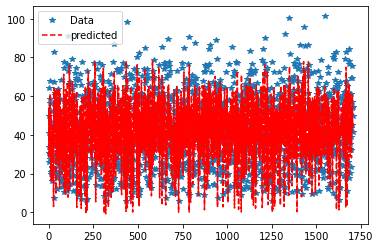

In [106]:
obsno=np.arange(0,1705,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_test,'*',label='Data')
ax.plot(obsno,y_pred,'r--',label='predicted')
ax.legend(loc='best')

# Normality

In [ ]:
actual = y_test
prediction = y_pred
residuals = actual - prediction
residuals

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(residuals, color='skyblue')
plt.title('Histogram of Residuals')
plt.ylabel('Prob')
plt.xlabel('Residuals')
plt.show()

# Constant Error Variance [homoscadasticity]


In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = prediction, y = residuals, palette='spring', color='teal')
plt.title('Scatterplot of predict vs residuals')